In [6]:
#port keras
import numpy
import numpy as np
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#Total COVID confirmed cases
df_confirmed = pd.read_excel('Data.xlsx', index_col=0,parse_dates=True,squeeze=True)

,YEAR,MO,DY,Confirmed,Deaths,Recovered,Excluded,Marrakesh-Safi
Date,,,,,,,,
2020-09-01,2020,9,1,128,10,NaN,NaN,NaN
2020-09-02,2020,9,2,160,7,NaN,NaN,NaN
2020-09-03,2020,9,3,191,12,NaN,NaN,NaN
2020-09-04,2020,9,4,203,9,NaN,NaN,NaN
2020-09-05,2020,9,5,234,10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-11-03,2020,11,3,157,8,NaN,NaN,NaN
2020-11-04,2020,11,4,290,8,NaN,NaN,NaN
2020-11-05,2020,11,5,269,6,NaN,NaN,NaN


In [13]:
df_confirmed= df_confirmed[['Confirmed']]
df_confirmed

,Confirmed
Date,
2020-09-01,128
2020-09-02,160
2020-09-03,191
2020-09-04,203
2020-09-05,234
...,...
2020-11-03,157
2020-11-04,290
2020-11-05,269


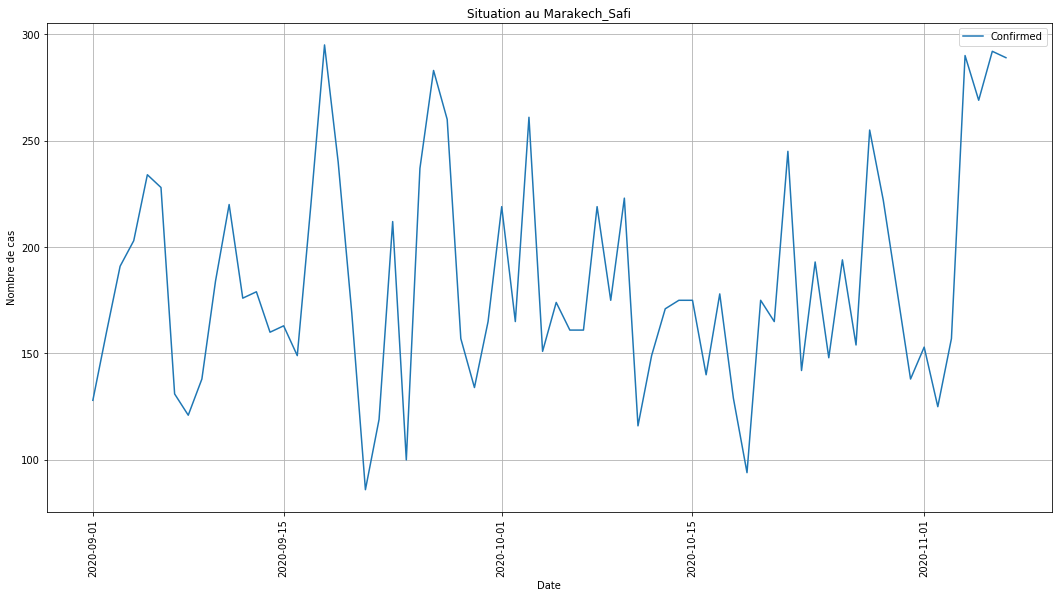

In [42]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(18,9))
plt.grid(True)
ax.plot(df_confirmed.Confirmed,label='Confirmed')
ax.set(xlabel='Date',ylabel='Nombre de cas',Title ='Situation au Marakech_Safi')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [16]:
#Use data until 14 days before as training
x = len(df_confirmed)-14
x

54

In [17]:
train=df_confirmed.iloc[:x]
test = df_confirmed.iloc[x:]

In [18]:
##scale or normalize data as the data is too skewed
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train) 

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)


In [19]:
## Use TimeSeriestrain_generator to generate data in sequences.
from keras.preprocessing.sequence import TimeseriesGenerator

In [20]:
#Sequence size has an impact on prediction, especially since COVID is unpredictable!
seq_size = 7  
n_features = 1 
train_generator = TimeseriesGenerator(train_scaled, train_scaled, length = seq_size, batch_size=1)
print("Total number of samples in the original training data = ", len(train)) 
print("Total number of samples in the generated data = ", len(train_generator))

Total number of samples in the original training data =  54
Total number of samples in the generated data =  47


In [21]:
#Check data shape from generator
x,y = train_generator[10]  #Check train_generator
#Takes 7 days as x and 8th day as y (for seq_size=7)

In [23]:
#Also generate test data
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=seq_size, batch_size=1)
print("Total number of samples in the original test data = ", len(test)) # 14 as we're using last 14 days for test
print("Total number of samples in the generated data = ", len(test_generator)) # 7
#Check data shape from generator
x,y = test_generator[0]

Total number of samples in the original test data =  14
Total number of samples in the generated data =  7


In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Activation

In [25]:
#Define Model 
model = Sequential()
model.add(LSTM(150, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(64))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()
print('Train...')





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 7, 150)            91200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                55040     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 150,465
Trainable params: 150,465
Non-trainable params: 0
_________________________________________________________________
Train...


In [26]:
history = model.fit_generator(train_generator, 
                              validation_data=test_generator, 
                              epochs=50, steps_per_epoch=10)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
10/10 [==============================] - 15s 2s/step - loss: 0.1931 - val_loss: 0.2800
Epoch 2/50
10/10 [==============================] - 1s 98ms/step - loss: 0.0313 - val_loss: 0.1366
Epoch 3/50
10/10 [==============================] - 1s 91ms/step - loss: 0.0527 - val_loss: 0.1700
Epoch 4/50
10/10 [==============================] - 1s 106ms/step - loss: 0.0777 - val_loss: 0.2200
Epoch 5/50
10/10 [==============================] - 1s 98ms/step - loss: 0.1048 - val_loss: 0.1869
Epoch 6/50
10/10 [==============================] - 1s 107ms/step - loss: 0.1375 - val_loss: 0.1231
Epoch 7/50
10/10 [==============================] - 1s 102ms/step - loss: 0.0593 - val_loss: 0.1831
Epoch 8/50
10/10 [==============================] - 1s 102ms/step - loss: 0.0195 - val_loss: 0.1911
Epoch 9/50
10/10 [==============================] - 1s 97ms/step - loss: 0.0403 - val_loss: 0.2065A: 0s - los

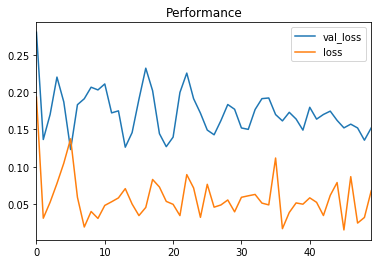

In [44]:
pd.DataFrame(history.history).plot(title="Performance")

In [27]:
#forecast
prediction = [] #Empty list to populate later with predictions

current_batch = train_scaled[-seq_size:] #Final data points in train 
current_batch = current_batch.reshape(1, seq_size, n_features) #Reshape

In [28]:
## Predict future, beyond test dates
future = 7 #Days
for i in range(len(test) + future):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)


In [29]:
### Inverse transform to before scaling so we get actual numbers
rescaled_prediction = scaler.inverse_transform(prediction)

In [30]:
time_series_array = test.index  #Get dates for test data

In [31]:
for k in range(0, future):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))

In [37]:
#Create a dataframe to capture the forecast data
df_forecast = pd.DataFrame(columns=["Confirmed","predicted"], index=time_series_array)

In [38]:
df_forecast.loc[:,"predicted"] = rescaled_prediction[:,0]
df_forecast.loc[:,"Confirmed"] = test["Confirmed"]

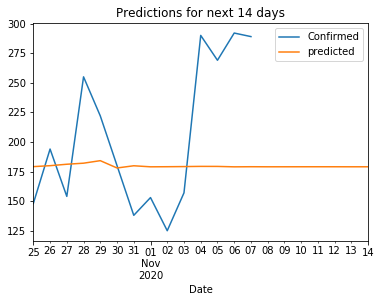

In [45]:
df_forecast.plot(title="Predictions for next 14 days")

In [46]:
df_forecast

,Confirmed,predicted
Date,,
2020-10-25,148.0,179.143138
2020-10-26,194.0,179.947461
2020-10-27,154.0,181.158822
2020-10-28,255.0,182.053728
2020-10-29,222.0,184.182593
2020-10-30,180.0,178.005824
2020-10-31,138.0,179.870045
2020-11-01,153.0,178.988978
2020-11-02,125.0,179.067148


In [47]:
MAPE =np.mean(np.abs(np.array(df_forecast["Confirmed"][:13])-np.array(df_forecast["predicted"][:13]) )/13)

In [50]:
MAPE

3.8022613123323787

In [51]:
accuracy  = 100-MAPE


In [52]:
accuracy

96.19773868766762

In [55]:
df_forecast=df_forecast[:14]

In [56]:
df_forecast

,Confirmed,predicted
Date,,
2020-10-25,148.0,179.143138
2020-10-26,194.0,179.947461
2020-10-27,154.0,181.158822
2020-10-28,255.0,182.053728
2020-10-29,222.0,184.182593
2020-10-30,180.0,178.005824
2020-10-31,138.0,179.870045
2020-11-01,153.0,178.988978
2020-11-02,125.0,179.067148


In [58]:
df_forecast.to_csv('RNN_Predicted.csv', sep=';', index=False)